In [3]:
import pandas as pd # This Library helps to do the Analysis
import numpy as np # This Library helps to do the math
import seaborn as sns # Visulization Library
import matplotlib.pyplot as plt # Visulization Library
import warnings # It is responsible to ignore system warnings
warnings.filterwarnings ('ignore')
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'vscode'


In [4]:
# Load our Dataset

df = pd.read_excel(r"C:\Users\soura\OneDrive\Desktop\Power BI Classes\Global_Superstore2.xlsx" , sheet_name='Sheet1')

In [5]:
# Understanding data types and data 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [6]:
# Check Blank data

df.isna().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

### EDA - Exploratory Data Analysis
- Bi-variate Data Analysis
- Single variate Data Analysis

In [7]:
df['Ship Mode'].value_counts()

Ship Mode
Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: count, dtype: int64

From the above we understand that majority of ship mode is of Satdard class. least is Same day

In [8]:
df['Sales']

0        2309.650
1        3709.395
2        5175.171
3        2892.510
4        2832.960
           ...   
51285      65.100
51286       0.444
51287      22.920
51288      13.440
51289      61.380
Name: Sales, Length: 51290, dtype: float64

### Pandas Method - Groupby and Aggregate

In [9]:
df_ship_mode_sales = df.groupby(df['Ship Mode']).agg({'Sales' : 'sum'})
df_ship_mode_sales.reset_index(inplace =True) # Dataset indexing happens here

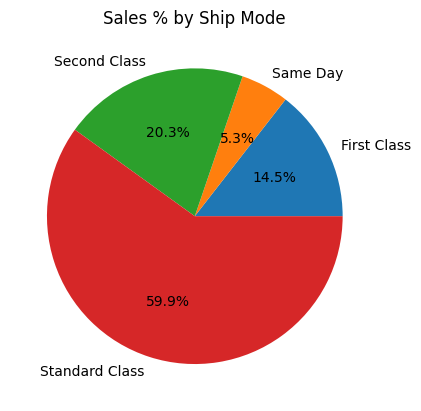

In [10]:
plt.pie(df_ship_mode_sales['Sales'], labels= df_ship_mode_sales['Ship Mode'], autopct='%.1f%%')
plt.title("Sales % by Ship Mode")
plt.show()

### Data in our dataframe are of mainly two categories
- Categorical Variables
- Numerical variables

Good Practice for visualisation

- Label Everything: All plots must have a clear title, properly labeled axes, and a legend if multiple groups or variables are present.

- Keep Scales Consistent: Use the same scale when comparing distributions or categories side-by-side to avoid misleading the viewer.

- Color Strategically: Use color to represent categories or to highlight important data points, but avoid using too many colors (generally no more than 6–8 distinct colors).

Order Matters: For categorical variables, often sorting the bars by count or value (descending or ascending) makes the chart much easier to read and interpret (a Pareto chart is an example of this).

In [11]:
df['Segment'].value_counts()

Segment
Consumer       26518
Corporate      15429
Home Office     9343
Name: count, dtype: int64

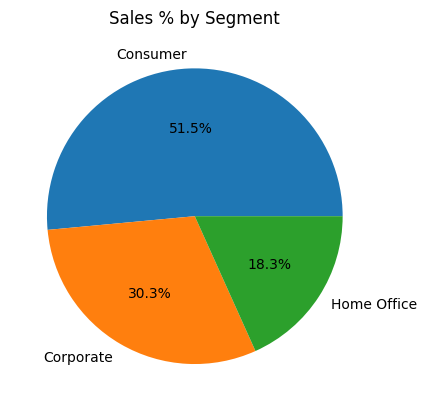

In [12]:
df_segment_sales = df.groupby(df['Segment']).agg({'Sales' : 'sum'})
df_segment_sales.reset_index(inplace =True) # Dataset indexing happens here

plt.pie(df_segment_sales['Sales'], labels= df_segment_sales['Segment'], autopct='%.1f%%')
plt.title("Sales % by Segment")
plt.show()

In [13]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [14]:
df['Category'].value_counts()

Category
Office Supplies    31273
Technology         10141
Furniture           9876
Name: count, dtype: int64

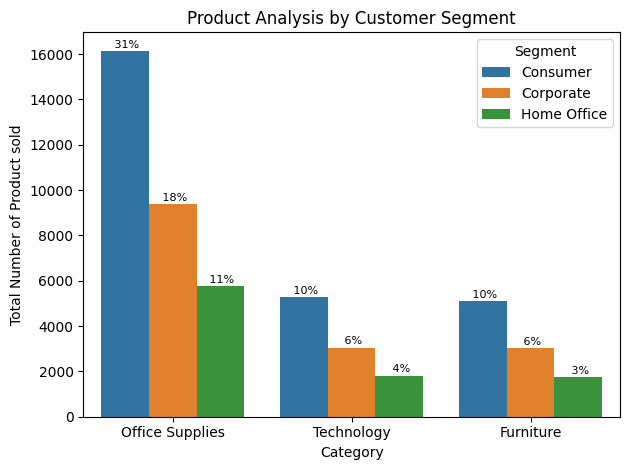

In [15]:
## Seaborn to visualize- Column Chart

plt.Figure(figsize=(20,9))
plt.title('Product Analysis by Customer Segment')
sns.countplot(x='Category', data=df, hue='Segment', order=df['Category'].value_counts().index)

total_order = len(df)

ax = plt.gca()
ax.set_ylabel("Total Number of Product sold")

for container in ax.containers:
    for bar in container.patches:
        height = bar.get_height() # the count value of the bar
        percentage = (height/total_order) *100

        ax.text(
            bar.get_x() + bar.get_width()/ 2, # X position
            height + 50, # Slightly above the bar
            f'{percentage: .0f}%',
            ha = 'center',
            va = 'bottom',
            fontsize =8
        )


plt.tight_layout()
plt.show()

## Inference from this visuals-

- Office Supplies has majoruty of sales , in Office supply Consumer has the most sales.
- Simmilar trend in other product category

## Homework- profit

In [16]:
df['Sub-Category'].value_counts()

Sub-Category
Binders        6152
Storage        5059
Art            4883
Paper          3538
Chairs         3434
Phones         3357
Furnishings    3170
Accessories    3075
Labels         2606
Envelopes      2435
Supplies       2425
Fasteners      2420
Bookcases      2411
Copiers        2223
Appliances     1755
Machines       1486
Tables          861
Name: count, dtype: int64

In [17]:
df_sub_category_sales = df.groupby(df['Sub-Category']).agg({'Sales' : 'sum'}).sort_values(by='Sales', ascending=False)
df_sub_category_sales.reset_index(inplace =True) # Dataset indexing happens here

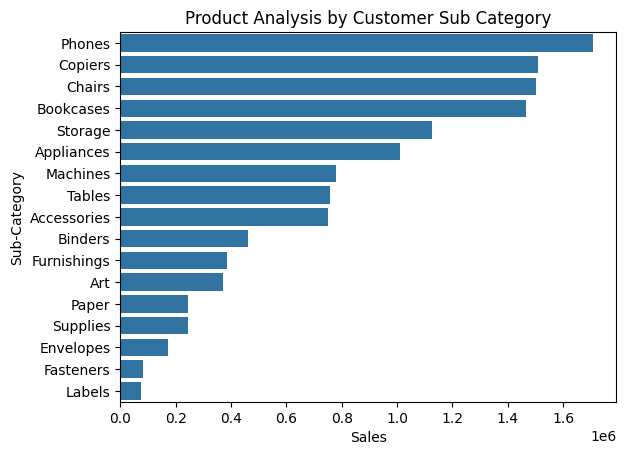

In [18]:
plt.Figure(figsize=(40,10))
plt.title('Product Analysis by Customer Sub Category')
sns.barplot(x='Sales', y = 'Sub-Category',data=df_sub_category_sales)
plt.show()

In [19]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

###
- Create visulaisation for - City, Country , market, Region
- Try tp create more groupby and create - Visuals 

In [20]:
df_sub_group = df.groupby(['City','State', 'Country','Market', 'Region']).agg(
    Total_Sales = ('Sales' , 'sum'),
    Mean_Profit = ('Profit', 'mean'),
    Order_count = ('Order ID', 'count')
).reset_index()


df_sub_group    

,City,State,Country,Market,Region,Total_Sales,Mean_Profit,Order_count
0,Aachen,North Rhine-Westphalia,Germany,EU,Central,3803.151,65.704765,17
1,Aalen,Baden-Württemberg,Germany,EU,Central,979.695,283.005000,1
2,Aalst,East Flanders,Belgium,EU,Central,387.330,38.077500,4
3,Aba,Abia,Nigeria,Africa,Africa,1064.124,-59.022240,25
4,Abadan,Khuzestan,Iran,EMEA,EMEA,1354.950,21.256364,11
...,...,...,...,...,...,...,...,...
3814,Zwedru,Grand Gedeh,Liberia,Africa,Africa,49.410,11.850000,1
3815,Zwickau,Saxony,Germany,EU,Central,99.030,6.460000,3
3816,Zwolle,Overijssel,Netherlands,EU,Central,150.585,-27.547500,2
3817,eMbalenhle,Mpumalanga,South Africa,Africa,Africa,75.900,6.810000,2


In [21]:
df_sub_group['Region'].value_counts()

Region
Central           879
South             786
EMEA              450
North Asia        332
North             323
Africa            316
Central Asia      183
West              170
East              114
Oceania            93
Southeast Asia     83
Canada             46
Caribbean          44
Name: count, dtype: int64

In [22]:
df['Ship Date']

0        31-07-2012
1        07-02-2013
2        18-10-2013
3        30-01-2013
4        06-11-2013
            ...    
51285    19-06-2014
51286    24-06-2014
51287    02-12-2013
51288    22-02-2012
51289    26-05-2012
Name: Ship Date, Length: 51290, dtype: object

##### Always convert date from Object to datetime

In [23]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])



In [24]:
# Feature Engineering

df['order_year'] = df['Order Date'].dt.year


In [25]:
df['order_year'].value_counts()

order_year
2014    17531
2013    13799
2012    10962
2011     8998
Name: count, dtype: int64

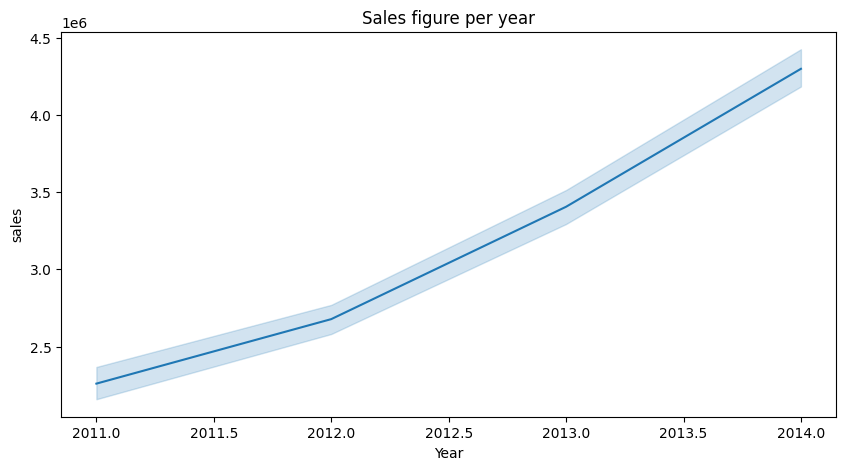

In [26]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x=df['order_year'], y=df['Sales'],estimator='sum')
plt.title("Sales figure per year")
plt.xlabel("Year")
plt.ylabel("sales")
plt.show()

#### Questions to our data 
- What is the growth rate of per year ?
- Which product is showing the highest potential interm of Growth/Sales
- Which region is showing high sales/profit
- Whihch Market/Country has the highest sales/profit
- Which Month Higest sales/profit
- Which segment highest sales ?
- Top 10 customers accross segments are giving the orders ?
- Which country /region highest sales of different sub categories ?
- Which countries has most customers ?
- How much supply should there be to cover our demands ? **Hard question** 
 1. What is our demand ?
 2. Predict the qty ?
- What is the shipping cost over the year accorss different countries/markets ?
***How maximise your profit, - Procure at less price/competititve price, minimize your shipping cost, getting our good according to priority***

In [27]:
df_growth_rate = df.groupby(['order_year']).agg(Total_Sales = ('Sales' , 'sum')).reset_index()
df_growth_rate

,order_year,Total_Sales
0,2011,2.259451e+06
1,2012,2.677439e+06
2,2013,3.405746e+06
3,2014,4.299866e+06


In [29]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority', 'order_year'],
      dtype='object')

###  Learnings 
- How to change data type - Object to datetime
- Groupby 
- Aggregation
- Pie chart - max 4 categirues
- Bar chart - Horizontal - Many categiries
- Column chart - Many categories but it should be lesser than barchart categories


### Which Region shows highest Sales & Profit?

In [31]:
# Which Region shows highest Sales & Profit?

region_df = df.groupby('Region').agg(
    total_sales = ('Sales','sum'),
    total_profit=('Profit','sum')
).sort_values('total_sales', ascending= False)


In [32]:
region_df

,total_sales,total_profit
Region,,
Central,2.822303e+06,311403.98164
South,1.600907e+06,140355.76618
North,1.248166e+06,194597.95252
Oceania,1.100185e+06,120089.11200
Southeast Asia,8.844232e+05,17852.32900
North Asia,8.483098e+05,165578.42100
EMEA,8.061613e+05,43897.97100
Africa,7.837732e+05,88871.63100
Central Asia,7.528266e+05,132480.18700


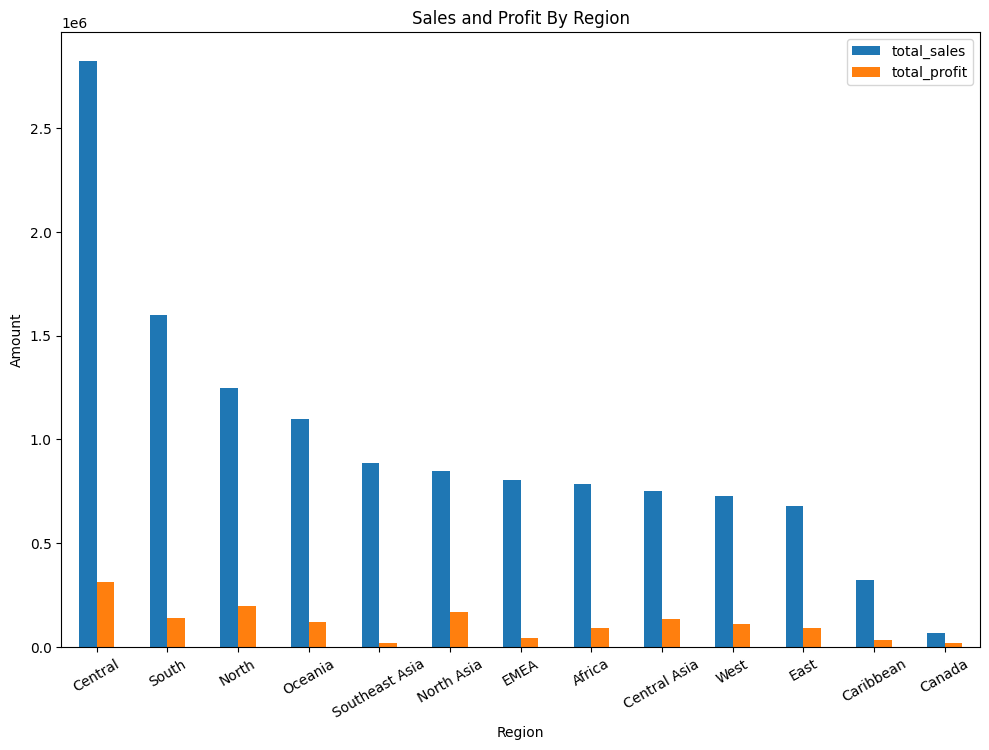

In [38]:
region_df.plot(kind='bar', figsize=(10,8), title='Sales and Profit By Region')
plt.ylabel('Amount'); plt.tight_layout() ; plt.xticks(rotation= 30); plt.show()

#### Whihch Market/Country has the highest sales/profit

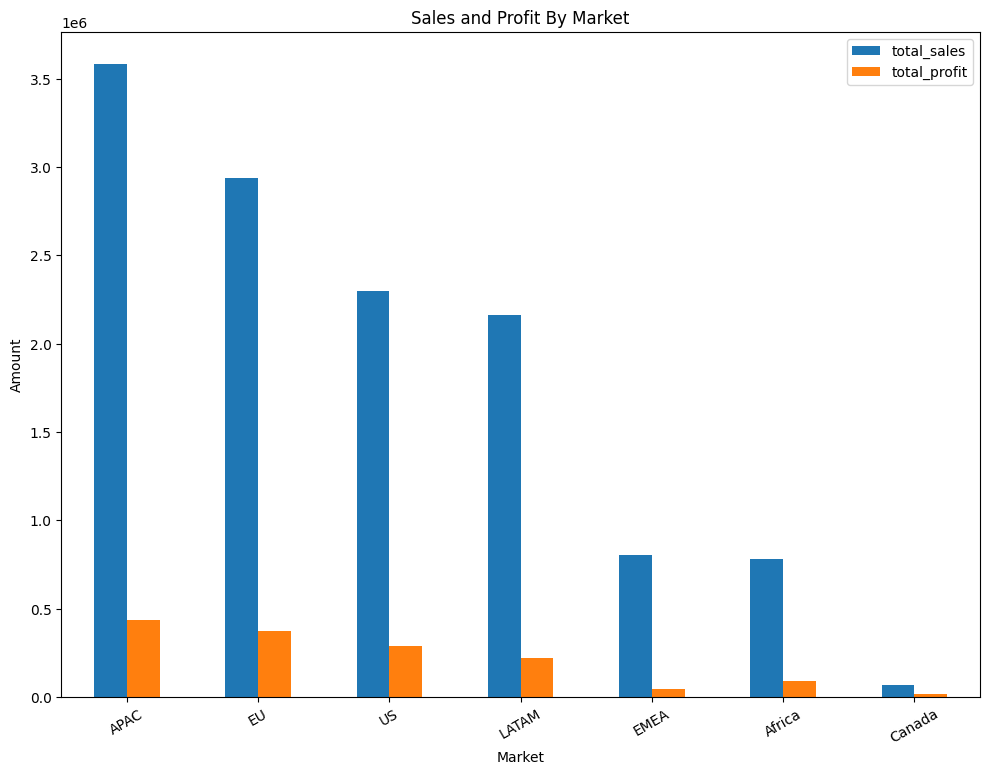

In [39]:
# Which Region shows highest Sales & Profit?

market_df = df.groupby('Market').agg(
    total_sales = ('Sales','sum'),
    total_profit=('Profit','sum')
).sort_values('total_sales', ascending= False)


market_df.plot(kind='bar', figsize=(10,8), title='Sales and Profit By Market')
plt.ylabel('Amount'); plt.tight_layout() ; plt.xticks(rotation= 30); plt.show()

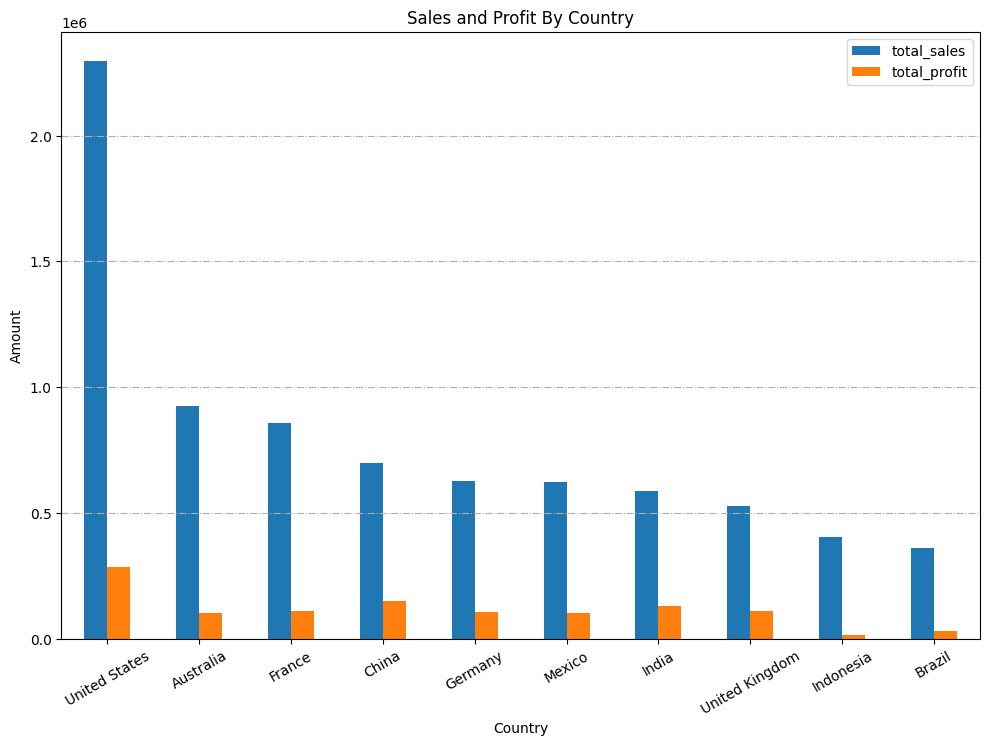

In [46]:
# Which Region shows highest Sales & Profit?

country_df = df.groupby('Country').agg(
    total_sales = ('Sales','sum'),
    total_profit=('Profit','sum')
).sort_values('total_sales', ascending= False)


country_df.head(10).plot(kind='bar', figsize=(10,8), title='Sales and Profit By Country')
plt.ylabel('Amount'); plt.tight_layout() ; plt.xticks(rotation= 30); plt.grid(axis='y', linestyle = '-.') ; plt.show()

In [52]:
df['Month'] = df['Order Date'].dt.month

In [53]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,order_year,Month
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,2012,7
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,2013,2
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,2013,10
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium,2013,1
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical,2013,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2014-62366,2014-06-19,2014-06-19,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,...,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,0.01,Medium,2014,6
51286,35398,US-2014-102288,2014-06-20,2014-06-24,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,...,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.1100,0.01,Medium,2014,6
51287,40470,US-2013-155768,2013-12-02,2013-12-02,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,...,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",22.920,3,0.0,11.2308,0.01,High,2013,12
51288,9596,MX-2012-140767,2012-02-18,2012-02-22,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,...,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,0.00,Medium,2012,2


In [54]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority', 'order_year', 'Month'],
      dtype='object')

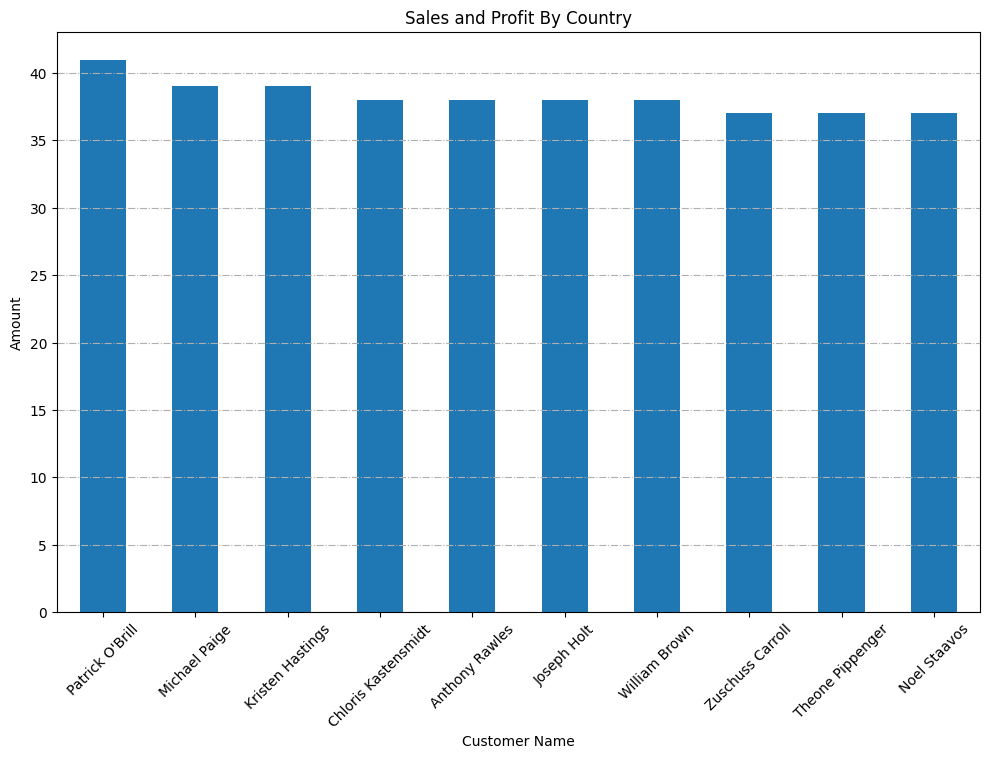

In [81]:
### Top 10 customers accross segments are giving the orders ?

top_customers = df.groupby(['Customer ID', 'Customer Name', 'Segment']).agg(
    order_count = ('Order ID', 'nunique'),
    total_sales = ('Sales','sum')
).sort_values('order_count', ascending= False).head(10)

# top_customers = top_customers.reset_index()

top_customers['order_count'].droplevel(['Segment','Customer ID']).plot(kind='bar', figsize=(10,8), title='Sales and Profit By Country')
plt.ylabel('Amount'); plt.tight_layout() ; plt.xticks(rotation=45); plt.grid(axis='y', linestyle = '-.') ; plt.show()

,,,order_count,total_sales
Customer ID,Customer Name,Segment,,
PO-18850,Patrick O'Brill,Consumer,41,25274.47020
MP-17965,Michael Paige,Corporate,39,17228.49770
KH-16690,Kristen Hastings,Corporate,39,18158.46010
CK-12205,Chloris Kastensmidt,Consumer,38,13625.20784
AR-10825,Anthony Rawles,Corporate,38,15311.03560
JH-15985,Joseph Holt,Consumer,38,18863.40440
WB-21850,William Brown,Consumer,38,16704.66120
ZC-21910,Zuschuss Carroll,Consumer,37,28472.81926
TP-21130,Theone Pippenger,Consumer,37,22697.57728


In [83]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost,order_year,Month
count,51290.00000,51290,51290,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,2013-05-11 21:26:49.155781120,2013-05-15 20:42:42.745174528,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915,2012.777208,7.522636
min,1.00000,2011-01-01 00:00:00,2011-01-03 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000,2011.000000,1.000000
25%,12823.25000,2012-06-19 00:00:00,2012-06-23 00:00:00,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000,5.000000
50%,25645.50000,2013-07-08 00:00:00,2013-07-12 00:00:00,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000,8.000000
75%,38467.75000,2014-05-22 00:00:00,2014-05-26 00:00:00,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000,10.000000
max,51290.00000,2014-12-31 00:00:00,2015-01-07 00:00:00,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014.000000,12.000000
std,14806.29199,NaN,NaN,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804,1.098931,3.300056
